begin Fri Jul 19 09:48:04 2019 <class 'numpy.ndarray'>


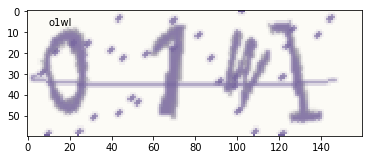

end 
begin Fri Jul 19 09:48:04 2019 <class 'numpy.ndarray'>


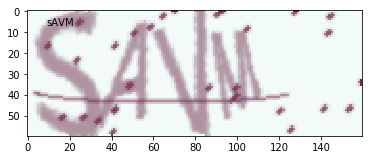

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


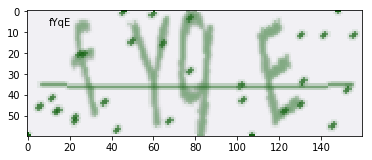

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


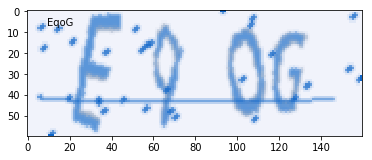

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


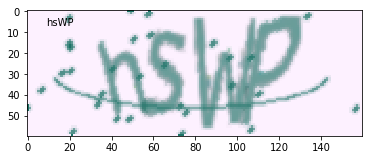

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


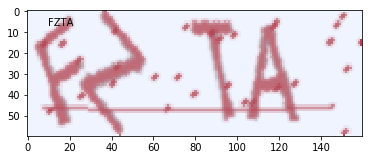

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


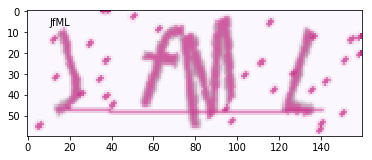

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


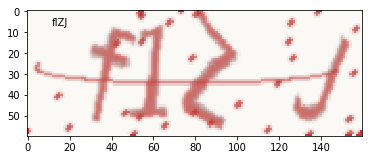

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


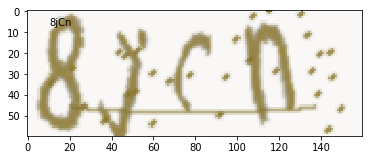

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


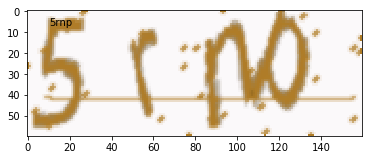

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


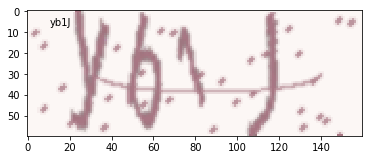

end 
begin Fri Jul 19 09:48:05 2019 <class 'numpy.ndarray'>


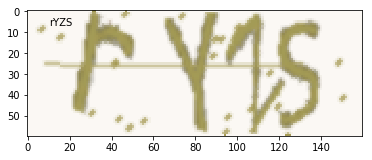

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


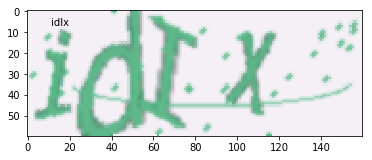

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


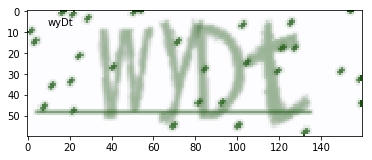

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


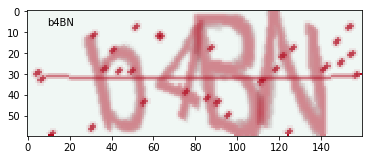

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


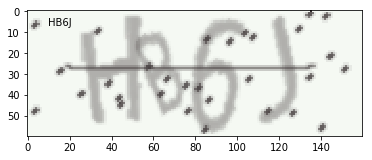

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


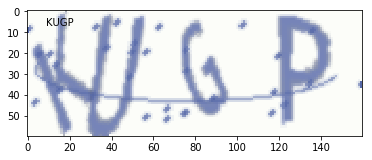

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


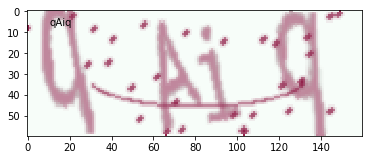

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


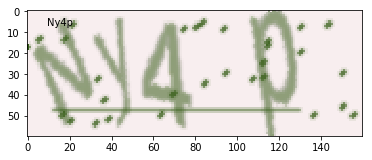

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


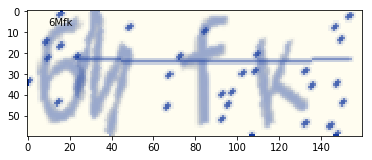

end 
begin Fri Jul 19 09:48:06 2019 <class 'numpy.ndarray'>


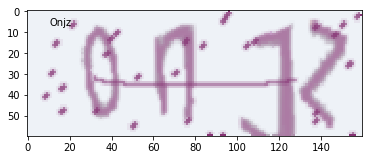

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


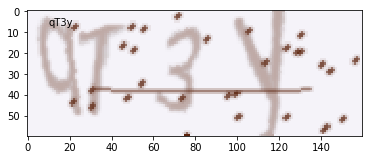

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


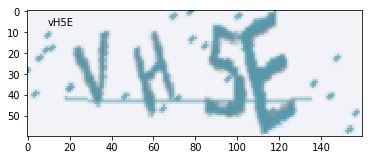

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


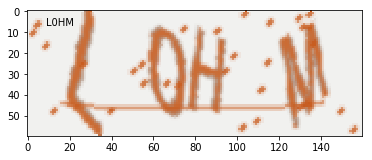

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


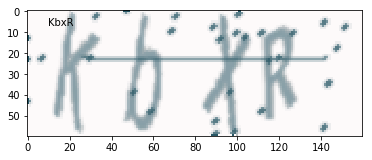

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


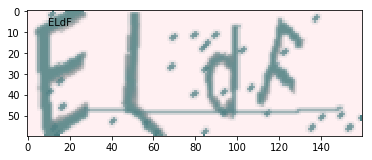

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


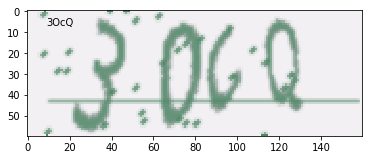

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


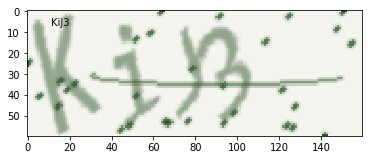

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


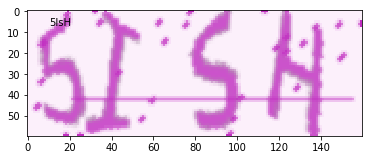

end 
begin Fri Jul 19 09:48:07 2019 <class 'numpy.ndarray'>


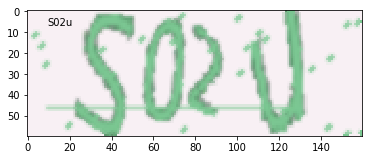

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


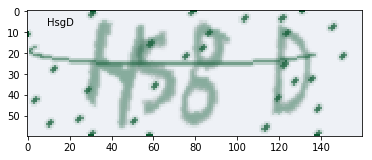

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


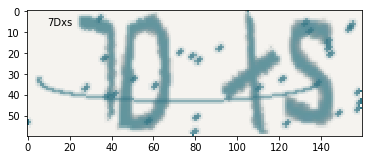

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


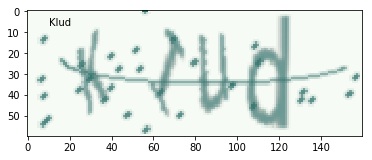

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


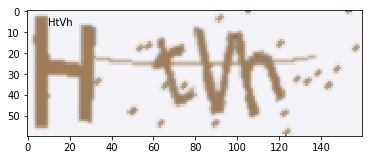

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


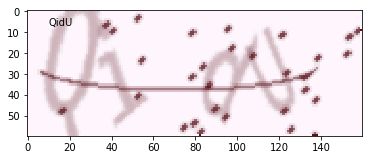

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


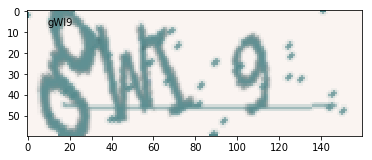

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


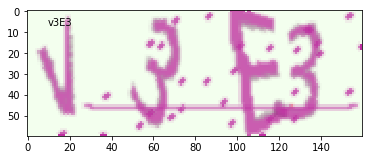

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


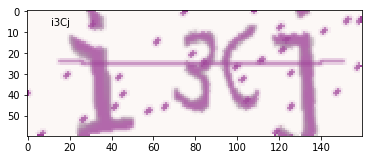

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


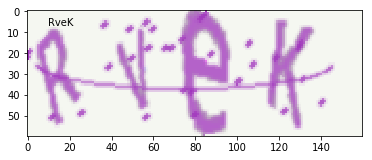

end 
begin Fri Jul 19 09:48:08 2019 <class 'numpy.ndarray'>


KeyboardInterrupt: 

In [16]:
#coding:utf-8
from captcha.image import ImageCaptcha  # pip install captcha
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random,time,os

# 验证码中的字符, 就不用汉字了
number = ['0','1','2','3','4','5','6','7','8','9']
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
ALPHABET = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
# 验证码一般都无视大小写；验证码长度4个字符
def random_captcha_text(char_set=number+alphabet+ALPHABET, captcha_size=4):
    captcha_text = []
    for i in range(captcha_size):
        c = random.choice(char_set)
        captcha_text.append(c)
    return captcha_text

# 生成字符对应的验证码
def gen_captcha_text_and_image():
    image = ImageCaptcha()

    captcha_text = random_captcha_text()
    captcha_text = ''.join(captcha_text)

    captcha = image.generate(captcha_text)
    #image.write(captcha_text, captcha_text + '.jpg')  # 写到文件

    #rm  =  'rm '+captcha_text + '.jpg'
    #print rm
    #os.system(rm)
    #time.sleep(10)

    captcha_image = Image.open(captcha)
    captcha_image = np.array(captcha_image)
    return captcha_text, captcha_image

if __name__ == '__main__':
    # 测试
    while(1):
        text, image = gen_captcha_text_and_image()
        print('begin',time.ctime(),type(image))
        f = plt.figure()
        ax = f.add_subplot(111)
        ax.text(0.1, 0.9,text, ha='center', va='center', transform=ax.transAxes)
        plt.imshow(image)


        plt.show()
        print('end '),time.ctime()

In [17]:
#coding:utf-8
from gen_captcha import gen_captcha_text_and_image
from gen_captcha import number
from gen_captcha import alphabet
from gen_captcha import ALPHABET

import numpy as np
import tensorflow as tf

text, image = gen_captcha_text_and_image()
print("验证码图像channel:", image.shape)  # (60, 160, 3)
# 图像大小
IMAGE_HEIGHT = 60
IMAGE_WIDTH = 160
MAX_CAPTCHA = len(text)
print("验证码文本最长字符数", MAX_CAPTCHA)   # 验证码最长4字符; 我全部固定为4,可以不固定. 如果验证码长度小于4，用'_'补齐

# 把彩色图像转为灰度图像（色彩对识别验证码没有什么用）
def convert2gray(img):
	if len(img.shape) > 2:
		gray = np.mean(img, -1)
		# 上面的转法较快，正规转法如下
		# r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
		# gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
		return gray
	else:
		return img

"""
cnn在图像大小是2的倍数时性能最高, 如果你用的图像大小不是2的倍数，可以在图像边缘补无用像素。
np.pad(image【,((2,3),(2,2)), 'constant', constant_values=(255,))  # 在图像上补2行，下补3行，左补2行，右补2行
"""

# 文本转向量
char_set = number + alphabet + ALPHABET + ['_']  # 如果验证码长度小于4, '_'用来补齐
CHAR_SET_LEN = len(char_set)
def text2vec(text):
	text_len = len(text)
	if text_len > MAX_CAPTCHA:
		raise ValueError('验证码最长4个字符')

	vector = np.zeros(MAX_CAPTCHA*CHAR_SET_LEN) #生成一个默认为0的向量
	def char2pos(c):
		if c =='_':
			k = 62
			return k
		k = ord(c)-48
		if k > 9:
			k = ord(c) - 55
			if k > 35:
				k = ord(c) - 61
				if k > 61:
					raise ValueError('No Map')
		return k
	for i, c in enumerate(text):
		idx = i * CHAR_SET_LEN + char2pos(c)
		vector[idx] = 1
	return vector
# 向量转回文本
def vec2text(vec):
	char_pos = vec.nonzero()[0]
	text=[]
	for i, c in enumerate(char_pos):
		char_at_pos = i #c/63
		char_idx = c % CHAR_SET_LEN
		if char_idx < 10:
			char_code = char_idx + ord('0')
		elif char_idx <36:
			char_code = char_idx - 10 + ord('A')
		elif char_idx < 62:
			char_code = char_idx-  36 + ord('a')
		elif char_idx == 62:
			char_code = ord('_')
		else:
			raise ValueError('error')
		text.append(chr(char_code))
	return "".join(text)

"""
#向量（大小MAX_CAPTCHA*CHAR_SET_LEN）用0,1编码 每63个编码一个字符，这样顺利有，字符也有
vec = text2vec("F5Sd")
text = vec2text(vec)
print(text)  # F5Sd
vec = text2vec("SFd5")
text = vec2text(vec)
print(text)  # SFd5
"""

# 生成一个训练batchv  一个批次为 默认128 张图片 转换为向量
def get_next_batch(batch_size=128):
	batch_x = np.zeros([batch_size, IMAGE_HEIGHT*IMAGE_WIDTH])
	batch_y = np.zeros([batch_size, MAX_CAPTCHA*CHAR_SET_LEN])

	# 有时生成图像大小不是(60, 160, 3)  反复获取验证码直到该验证码符合标准格式。
	def wrap_gen_captcha_text_and_image():
		while True:
			text, image = gen_captcha_text_and_image()
			if image.shape == (60, 160, 3):
				return text, image

	for i in range(batch_size):
		#获取图片，并灰度转换
		text, image = wrap_gen_captcha_text_and_image()
		image = convert2gray(image)

		# flatten 图片一维化 以及对应的文字内容也一维化，形成一个128行每行一个图片及对应文本
		batch_x[i,:] = image.flatten() / 255 # (image.flatten()-128)/128  mean为0
		batch_y[i,:] = text2vec(text)

	return batch_x, batch_y

####################################################################

# 申请三个占位符
X = tf.placeholder(tf.float32, [None, IMAGE_HEIGHT*IMAGE_WIDTH])
Y = tf.placeholder(tf.float32, [None, MAX_CAPTCHA*CHAR_SET_LEN])
keep_prob = tf.placeholder(tf.float32) # dropout

# 定义CNN
def crack_captcha_cnn(w_alpha=0.01, b_alpha=0.1):
	x = tf.reshape(X, shape=[-1, IMAGE_HEIGHT, IMAGE_WIDTH, 1])

	#w_c1_alpha = np.sqrt(2.0/(IMAGE_HEIGHT*IMAGE_WIDTH)) #
	#w_c2_alpha = np.sqrt(2.0/(3*3*32))
	#w_c3_alpha = np.sqrt(2.0/(3*3*64))
	#w_d1_alpha = np.sqrt(2.0/(8*32*64))
	#out_alpha = np.sqrt(2.0/1024)

	# 3 conv layer # 3 个 转换层
	w_c1 = tf.Variable(w_alpha*tf.random_normal([3, 3, 1, 32]))
	b_c1 = tf.Variable(b_alpha*tf.random_normal([32]))
	conv1 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(x, w_c1, strides=[1, 1, 1, 1], padding='SAME'), b_c1))
	conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
	conv1 = tf.nn.dropout(conv1, keep_prob)

	w_c2 = tf.Variable(w_alpha*tf.random_normal([3, 3, 32, 64]))
	b_c2 = tf.Variable(b_alpha*tf.random_normal([64]))
	conv2 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(conv1, w_c2, strides=[1, 1, 1, 1], padding='SAME'), b_c2))
	conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
	conv2 = tf.nn.dropout(conv2, keep_prob)

	w_c3 = tf.Variable(w_alpha*tf.random_normal([3, 3, 64, 64]))
	b_c3 = tf.Variable(b_alpha*tf.random_normal([64]))
	conv3 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(conv2, w_c3, strides=[1, 1, 1, 1], padding='SAME'), b_c3))
	conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
	conv3 = tf.nn.dropout(conv3, keep_prob)

	# Fully connected layer  # 最后连接层
	w_d = tf.Variable(w_alpha*tf.random_normal([8*20*64, 1024]))
	b_d = tf.Variable(b_alpha*tf.random_normal([1024]))
	dense = tf.reshape(conv3, [-1, w_d.get_shape().as_list()[0]])
	dense = tf.nn.relu(tf.add(tf.matmul(dense, w_d), b_d))
	dense = tf.nn.dropout(dense, keep_prob)

	# 输出层
	w_out = tf.Variable(w_alpha*tf.random_normal([1024, MAX_CAPTCHA*CHAR_SET_LEN]))
	b_out = tf.Variable(b_alpha*tf.random_normal([MAX_CAPTCHA*CHAR_SET_LEN]))
	out = tf.add(tf.matmul(dense, w_out), b_out)
	#out = tf.nn.softmax(out)
	return out

# 训练
def train_crack_captcha_cnn():
	output = crack_captcha_cnn()
	# loss 损失数值
	# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(output, Y))
	loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output, labels=Y))
        # 最后一层用来分类的softmax和sigmoid有什么不同？
	# optimizer 为了加快训练 learning_rate 应该开始大，然后慢慢衰
	optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

	predict = tf.reshape(output, [-1, MAX_CAPTCHA, CHAR_SET_LEN])
	max_idx_p = tf.argmax(predict, 2)
	max_idx_l = tf.argmax(tf.reshape(Y, [-1, MAX_CAPTCHA, CHAR_SET_LEN]), 2)
	correct_pred = tf.equal(max_idx_p, max_idx_l)
	accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

	saver = tf.train.Saver()
	with tf.Session() as sess:
		sess.run(tf.global_variables_initializer())

		step = 0
		while True:
			batch_x, batch_y = get_next_batch(64)
			_, loss_ = sess.run([optimizer, loss], feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.75})
			print(step, loss_)

			# 每100 step计算一次准确率
			if step % 100 == 0:
				batch_x_test, batch_y_test = get_next_batch(100)
				acc = sess.run(accuracy, feed_dict={X: batch_x_test, Y: batch_y_test, keep_prob: 1.})
				print(step, acc)
				# 如果准确率大于50%,保存模型,完成训练
				if acc > 0.5:
					saver.save(sess, "crack_capcha.model", global_step=step)
					break
			step += 1

def crack_captcha(captcha_image):
	output = crack_captcha_cnn()

	saver = tf.train.Saver()
	with tf.Session() as sess:
		saver.restore(sess, tf.train.latest_checkpoint('.'))

		predict = tf.argmax(tf.reshape(output, [-1, MAX_CAPTCHA, CHAR_SET_LEN]), 2)
		text_list = sess.run(predict, feed_dict={X: [captcha_image], keep_prob: 1})

		text = text_list[0].tolist()
		vector = np.zeros(MAX_CAPTCHA*CHAR_SET_LEN)
		i = 0
		for n in text:
				vector[i*CHAR_SET_LEN + n] = 1
				i += 1
		return vec2text(vector)

if __name__ == '__main__':

	text, image = gen_captcha_text_and_image()
	image = convert2gray(image) #生成一张新图
	image = image.flatten() / 255 # 将图片一维化
	predict_text = crack_captcha(image) #导入模型识别
	print("正确: {}  预测: {}".format(text, predict_text))
	#train_crack_captcha_cnn()

ModuleNotFoundError: No module named 'gen_captcha'